<a href="https://colab.research.google.com/github/aderdouri/PINNs/blob/master/Tutorials/PDE_Solvers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Black-Scholes Partial Differential Equation (PDE)
The value of an option $V(S, t)$ satisfies the Black-Scholes PDE:
$$
\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + r S \frac{\partial V}{\partial S} - r V = 0
$$

### Initial and Boundary Conditions of the Black-Scholes PDE

The initial and boundary conditions for the Black-Scholes PDE depend on the type of derivative being priced, such as European call or put options. These conditions are necessary for solving the PDE and obtaining specific option prices. We will consider a Call option.

- $\textbf{Initial Condition}$ (at $t = T$):
    - $\text{Call: } V(S, T) = \max(S - K, 0)$ \\
- $\textbf{Boundary Conditions:}$
  - $V(0, t) = 0$ \\
  - $V(S, t) \to S - K e^{-r(T-t)} \quad \text{as } S \to \infty$

These conditions, combined with the Black-Scholes PDE, provide a complete specification for determining the price of the option.


## Implementation

In [1]:
import os
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'

In [2]:
!pip install tf-quant-finance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.6 MB/s eta 0:00:00


In [3]:
import tensorflow.compat.v2 as tf
import tf_quant_finance as tff
import numpy as np
import matplotlib.pyplot as plt

pde = tff.math.pde

grid = pde.grids.uniform_grid(minimums=[-1],
                              maximums=[1],
                              sizes=[300],
                              dtype=tf.float32)

In [4]:
grid_np = np.linspace(-1, 1, 300) # Create a NumPy array with 300 points between -1 and 1
grid = [tf.constant(grid_np, dtype=tf.float32)] # Convert the NumPy array to a TensorFlow constant

In [5]:
d = 1
mu = 2
r = 3

def second_order_coeff_fn(t, grid):
  return [[-d]]

def first_order_coeff_fn(t, grid):
  return [mu]

def zeroth_order_coeff_fn(t, grid):
  return -r

In [6]:
variance = 0.2
xs = grid[0]
initial_value_grid = (tf.math.exp(-xs**2 / (2 * variance)) / tf.math.sqrt(2 * np.pi * variance))

In [7]:
t_0 = 0
t_1 = 1
num_time_steps = 100

In [8]:
result_value_grid, final_grid, end_time, steps_performed = (
    pde.fd_solvers.solve_forward(
        start_time=t_0,
        end_time=t_1,
        num_steps=num_time_steps,
        coord_grid=grid,
        values_grid=initial_value_grid,
        second_order_coeff_fn=second_order_coeff_fn,
        first_order_coeff_fn=first_order_coeff_fn,
        zeroth_order_coeff_fn=zeroth_order_coeff_fn))

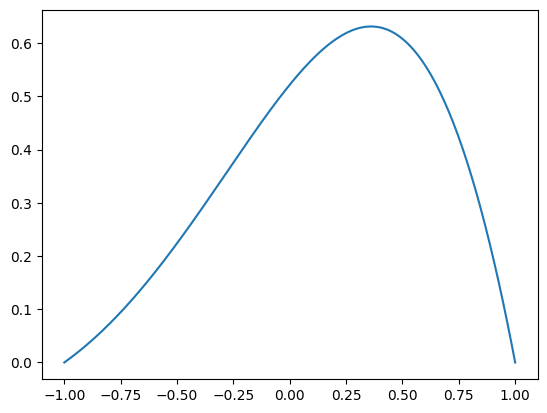

In [9]:
import matplotlib.pyplot as plt

xs = final_grid[0].numpy()
vs = result_value_grid.numpy()
plt.plot(xs, vs)

In [10]:
sigma = 1
r = 3

def second_order_coeff_fn(t, grid):
  s = grid[0]
  return [[sigma**2 * s**2 / 2]]

def first_order_coeff_fn(t, grid):
  s = grid[0]
  return [r * s]

def zeroth_order_coeff_fn(t, grid):
  return -r

In [11]:
sigma = 1
mu = 2

def inner_second_order_coeff_fn(t, grid):
  s = grid[0]
  return [[-sigma**2 * s**2 / 2]]

def inner_first_order_coeff_fn(t, grid):
  s = grid[0]
  return [mu * s]

# Replace '...' with the required arguments
result_value_grid, final_grid, end_time, steps_performed = (
    pde.fd_solvers.solve_forward(
        start_time=t_0,  # Provide start time
        end_time=t_1,  # Provide end time
        num_steps=num_time_steps, # Provide number of time steps
        coord_grid=grid,  # Provide coordinate grid
        values_grid=initial_value_grid,  # Provide initial value grid
        inner_second_order_coeff_fn=inner_second_order_coeff_fn,
        inner_first_order_coeff_fn=inner_first_order_coeff_fn))

In [12]:
sigma = 1
mu = 2

def second_order_coeff_fn(t, grid):
  return [[-sigma**2 / 2]]

def first_order_coeff_fn(t, grid):
  return [mu]

def inner_second_order_coeff_fn(t, grid):
  s = grid[0]
  return [[s**2]]

def inner_first_order_coeff_fn(t, grid):
  s = grid[0]
  return [s]

# Provide the missing positional arguments explicitly
result_value_grid, final_grid, end_time, steps_performed = (
    pde.fd_solvers.solve_forward(
        start_time=t_0,  # Start time
        end_time=t_1,  # End time
        num_steps=num_time_steps,  # Number of time steps
        coord_grid=grid,  # Coordinate grid
        values_grid=initial_value_grid,  # Initial value grid
        second_order_coeff_fn=second_order_coeff_fn,
        first_order_coeff_fn=first_order_coeff_fn,
        inner_second_order_coeff_fn=inner_second_order_coeff_fn,
        inner_first_order_coeff_fn=inner_first_order_coeff_fn))

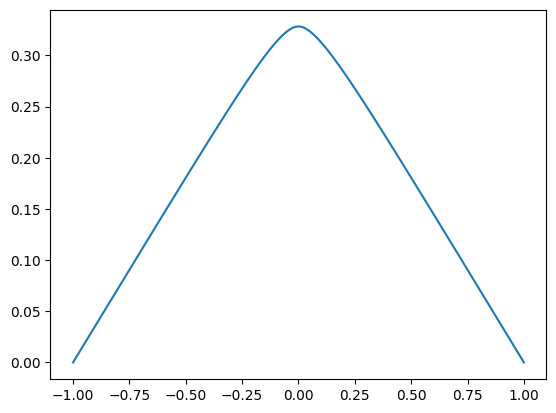

In [13]:
import matplotlib.pyplot as plt

xs = final_grid[0].numpy()
vs = result_value_grid.numpy()
plt.plot(xs, vs)